In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from numpy.random import seed
from scipy.stats import multivariate_normal
import scipy.stats as stats
from sklearn import decomposition
import seaborn as sns

In [2]:
pwd

'C:\\Users\\Tran Tan Phong\\Term 6 - Multivariate Statistic'

In [3]:
data = np.loadtxt('T8-7.dat' )
df = pd.DataFrame(data)
df.columns =['Family','DistRD','Cotton','Maize','Sorg','Millet','Bull','Cattle','Goats']
n, p = df.shape
print(df.head())

   Family  DistRD  Cotton  Maize  Sorg  Millet  Bull  Cattle  Goats
0    12.0    80.0     1.5    1.0   3.0    0.25   2.0     0.0    1.0
1    54.0     8.0     6.0    4.0   0.0    1.00   6.0    32.0    5.0
2    11.0    13.0     0.5    1.0   0.0    0.00   0.0     0.0    0.0
3    21.0    13.0     2.0    2.5   1.0    0.00   1.0     0.0    5.0
4    61.0    30.0     3.0    5.0   0.0    0.00   4.0    21.0    0.0


### (a) Construct two-dimensional scatterplots of Family versus DistRd, and DistRd versus Cattle. Remove any obvious outliers from the data set

In [4]:
def remove_outlier(data):
   '''
        Purpose: Remove outlier
        Input: data
        Output: the encoded DataFrame 
   '''
   Q1 = data.quantile(0.25)
   Q3 = data.quantile(0.75)
   IQR = Q3 - Q1
   data_after = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
   print('Shape of data before handling outlier values: ', data.shape)
   print('Shape of data after handling outlier values: ', data_after.shape)
   return data_after   

<function matplotlib.pyplot.show(close=None, block=None)>

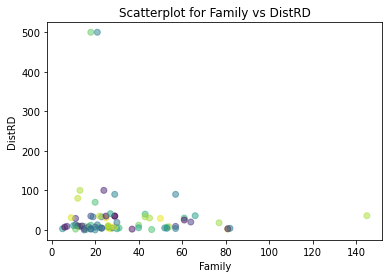

In [5]:
N = 76
colors = np.random.rand(N)
plt.scatter(df['Family'],df['DistRD'], c=colors,alpha=0.5)
plt.xlabel('Family')
plt.ylabel('DistRD')
plt.title('Scatterplot for Family vs DistRD')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

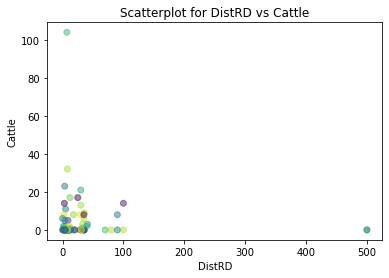

In [6]:
plt.scatter(df['DistRD'],df['Cattle'], c=colors,alpha=0.5)
plt.xlabel('DistRD')
plt.ylabel('Cattle')
plt.title('Scatterplot for DistRD vs Cattle')
plt.show

In [7]:
#df_1=remove_outlier(df)
df_1=df.loc[df['DistRD']<400 ]
df_1=df_1.loc[ df_1['Family']<100 ]
df_1=df_1.loc[df_1['Cattle']<80]
df_1.shape

(72, 9)

<function matplotlib.pyplot.show(close=None, block=None)>

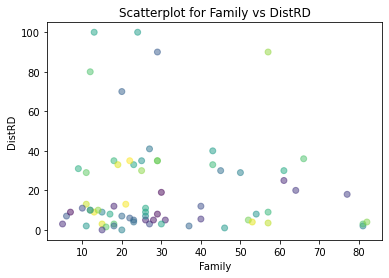

In [8]:
N = 72
colors = np.random.rand(N)
plt.scatter(df_1['Family'],df_1['DistRD'], c=colors,alpha=0.5)
plt.xlabel('Family')
plt.ylabel('DistRD')
plt.title('Scatterplot for Family vs DistRD')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

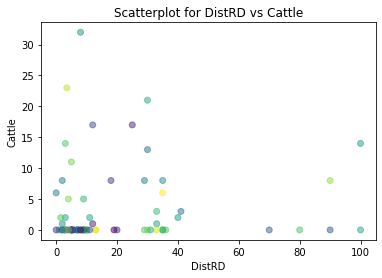

In [9]:
plt.scatter(df_1['DistRD'],df_1['Cattle'], c=colors,alpha=0.5)
plt.xlabel('DistRD')
plt.ylabel('Cattle')
plt.title('Scatterplot for DistRD vs Cattle')
plt.show

### (b) Perform a principal component analysis using the correlation matrix R. 
### Determine the number of components to effectively summarize the variability. 
### Use the propertion of variation explained and a scree plot to aid in your determination

In [10]:
#X, y = df.values, df.iloc[:, 0].values

In [11]:
# from sklearn.preprocessing import StandardScaler
# X_std = StandardScaler().fit_transform(X)

In [12]:
# mean_vec = np.mean(X_std, axis=0)
# cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)
label = df_1.index.values
X = df_1.values
mean = X.mean(axis = 0 ) # tính trung bình 
sigma = X.std(axis = 0 )

Z = (X-mean)/sigma
S = (X - mean).T @ (X - mean) / (n -1 ) # tính ma trận hiệp phương sai
R = Z.T @ Z / (n )

In [13]:
print('Mean : \n {}'.format(pd.DataFrame(mean)))

print()
print('*'*100)
print('Covariance matrix S : \n {} '.format(pd.DataFrame(S)))

print()
print('*'*100)
print('Correlation matrix Z : \n {}'.format(pd.DataFrame(R)))

Mean : 
            0
0  30.875000
1  20.201389
2   2.928472
3   2.059028
4   2.402778
5   1.597222
6   2.527778
7   3.347222
8   2.722222

****************************************************************************************************
Covariance matrix S : 
             0           1          2          3          4          5  \
0  369.438333  -14.215833  39.189417  22.047083  13.475000  20.575000   
1  -14.215833  551.677731  -1.968171   4.515255  -9.267870  -4.215463   
2   39.189417   -1.968171   7.257388   3.375053   1.980324   2.045009   
3   22.047083    4.515255   3.375053   3.064155  -0.094491   0.662824   
4   13.475000   -9.267870   1.980324  -0.094491   3.264259   1.417407   
5   20.575000   -4.215463   2.045009   0.662824   1.417407   4.649259   
6   35.210000    1.664630   5.526907   2.750093   1.435926   1.810741   
7   66.428333    8.812870  10.073843   5.793657   0.679074   1.687593   
8   26.193333   15.127037   3.781593   0.335741   1.614074   2.029259   

    

In [14]:
# cov_mat = np.cov(X_std.T)

# eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)
eigen_val1 , eigen_vec1 = np.linalg.eigh(S)
print('Eigenvalues : \n {}'.format(eigen_val1))
print('\n')
print('Eigenvectors : \n {}'.format(eigen_vec1))
# Sắp xếp các trị riêng theo thứ tự giảm dần
sort_index1 = np.argsort(eigen_val1)[::-1]
sort_eigen_val1 = eigen_val1[sort_index1]
# Sắp xếp các vector riêng tương ứng với trị riêng đó
sort_eigen_vec1 = eigen_vec1[:,sort_index1]

Eigenvalues : 
 [5.36458452e-01 1.09189080e+00 2.35260052e+00 3.33742656e+00
 4.03098639e+00 1.17235985e+01 2.79172984e+01 3.94373473e+02
 5.53436838e+02]


Eigenvectors : 
 [[ 0.02385413  0.00571889 -0.02517379  0.05032241 -0.11919699  0.04672861
   0.22143922  0.96187424 -0.07485551]
 [ 0.0051304   0.00175088 -0.01580148 -0.01490433  0.00703739  0.01849357
   0.02996574  0.07086065  0.99658822]
 [ 0.4489858  -0.48901612  0.02548982  0.06710397  0.72806369 -0.03600746
  -0.10787094  0.10505451 -0.00874374]
 [-0.79968312 -0.23767624  0.37314249  0.1999262   0.29545409  0.17833109
  -0.04627766  0.05955952  0.00520166]
 [-0.3827022  -0.00975451 -0.80178423 -0.31730279  0.28243767 -0.15923738
   0.05771637  0.03316618 -0.01860399]
 [-0.02629939 -0.0282448   0.42256133 -0.8861315   0.06195232 -0.14402374
   0.0853357   0.05245584 -0.01042797]
 [ 0.01277457  0.8271639   0.14003684  0.08423034  0.49271378 -0.11585075
  -0.15343445  0.09591014 -0.0015744 ]
 [-0.01068291 -0.03919365 -0.086460

In [15]:
eigen_val2 , eigen_vec2 = np.linalg.eigh(R)
print('Eigenvalues : \n {}'.format(eigen_val2))
print('\n')
print('Eigenvectors : \n {}'.format(eigen_vec2))
# Sắp xếp các trị riêng theo thứ tự giảm dần
sort_index2 = np.argsort(eigen_val2)[::-1]
sort_eigen_val2 = eigen_val2[sort_index2]
# Sắp xếp các vector riêng tương ứng với trị riêng đó
sort_eigen_vec2 = eigen_vec2[:,sort_index2]

Eigenvalues : 
 [0.1119363  0.16278178 0.22739077 0.34686554 0.57251824 0.75014303
 1.02742113 1.36239802 3.96486097]


Eigenvectors : 
 [[-0.24862206  0.26281017 -0.79746017  0.03997862  0.01132705 -0.17120143
   0.09840025  0.06508869 -0.43384271]
 [-0.06469259  0.04790053  0.02106965 -0.1865822  -0.37766811 -0.49561039
  -0.56856059 -0.49667091 -0.00758703]
 [-0.67521059 -0.32948454  0.36124785  0.19968612 -0.21870789  0.02733684
   0.132117   -0.00891725 -0.44614032]
 [ 0.5744495  -0.36297395 -0.02382879  0.27321206 -0.07920345 -0.24020492
   0.3882035  -0.35257149 -0.3522284 ]
 [ 0.29340194 -0.12556392 -0.02061874 -0.24598733 -0.64457738  0.05854254
  -0.11149246  0.60366742 -0.20362211]
 [ 0.04795829 -0.07713302  0.2407061  -0.18077867  0.52696668 -0.61632679
  -0.11595977  0.41515952 -0.2403611 ]
 [ 0.18962561  0.75050803  0.39621919  0.13405398 -0.02829987  0.14559178
  -0.03038787 -0.06804248 -0.44527368]
 [ 0.03806691 -0.16866186 -0.01063587 -0.75905049  0.21753184  0.3729337

In [16]:
# #Explained Variance
# tot = sum(eig_vals)
# var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

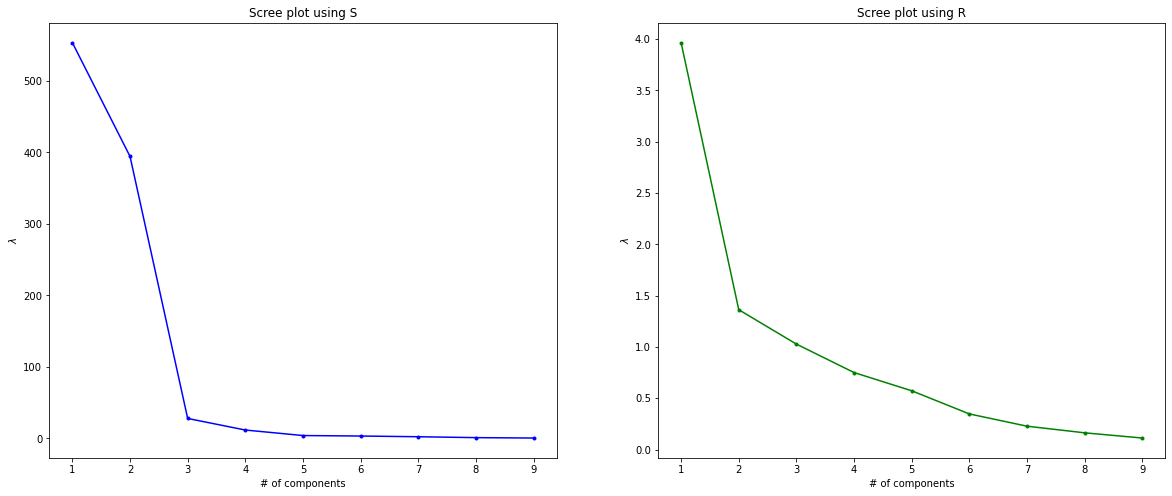

In [17]:
# with plt.style.context('seaborn-whitegrid'):
#     plt.figure(figsize=(6, 4))

#     plt.bar(range(9), var_exp, alpha=0.5, align='center',
#             label='individual explained variance')
#     plt.step(range(9), cum_var_exp, where='mid',
#              label='cumulative explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()
fig,ax = plt.subplots(1,2 , figsize = (20,8))

component = np.arange(1,p+1)
ax[0].plot(component,sort_eigen_val1 ,'b.-')
ax[0].set_xlabel('# of components')
ax[0].set_ylabel('$\lambda$')
ax[0].set_title('Scree plot using S')

ax[1].plot(component,sort_eigen_val2 ,'g.-')
ax[1].set_xlabel('# of components')
ax[1].set_ylabel('$\lambda$')
ax[1].set_title('Scree plot using R')
plt.show()

In [18]:
# pca = decomposition.PCA(n_components=9)
# pc = pca.fit_transform(df)

# PC_values = np.arange(pca.n_components_) +1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Proportion of Variance Explained')
# plt.show()

In [19]:
pca = decomposition.PCA(n_components=5)
pc = pca.fit_transform(df_1)
for i in range(5):
    print(pca.explained_variance_ratio_[i])

0.5541014435230818
0.39484706418803717
0.02795082341944199
0.011737677043726462
0.00403582707979939


In [20]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=df_1.columns)
loadings

,PC1,PC2,PC3,PC4,PC5
Family,-0.074856,0.961874,-0.221439,-0.046729,0.119197
DistRD,0.996588,0.070861,-0.029966,-0.018494,-0.007037
Cotton,-0.008744,0.105055,0.107871,0.036007,-0.728064
Maize,0.005202,0.059560,0.046278,-0.178331,-0.295454
Sorg,-0.018604,0.033166,-0.057716,0.159237,-0.282438
Millet,-0.010428,0.052456,-0.085336,0.144024,-0.061952
Bull,-0.001574,0.095910,0.153434,0.115851,-0.492714
Cattle,0.007628,0.190577,0.925248,-0.217815,0.155331
Goats,0.024281,0.076309,0.214592,0.925965,0.133675


Ta chọn 5 thành phần chính đầu tiên cho thật toán PCA

In [21]:
pca = decomposition.PCA(n_components=5)
pc = pca.fit_transform(df_1)
print(pca.explained_variance_ratio_)

[0.55410144 0.39484706 0.02795082 0.01173768 0.00403583]


In [22]:
print(pca.singular_values_)

[203.73454021 171.98258777  45.75803077  29.6524854   17.38746616]


### Ta chọn số thành phần chính là 5

### (c) Interpret the first five principal components. Can you identify, for example, a "farm size" component? A, perhaps, "goats and distance to road" component?

In [23]:
n_component2 = 5 

k_eigen_vec2 = sort_eigen_vec2[:,0:n_component2]


for i in range(n_component2):
    print('Trị riêng lambda{} là {:.1f} và vector riêng tương ứng : \n{}'.format(i + 1,sort_eigen_val2[i], np.round(k_eigen_vec2[:,i],5) ))
    print()

Trị riêng lambda1 là 4.0 và vector riêng tương ứng : 
[-0.43384 -0.00759 -0.44614 -0.35223 -0.20362 -0.24036 -0.44527 -0.35541
 -0.25455]

Trị riêng lambda2 là 1.4 và vector riêng tương ứng : 
[ 0.06509 -0.49667 -0.00892 -0.35257  0.60367  0.41516 -0.06804 -0.28447
  0.04867]

Trị riêng lambda3 là 1.0 và vector riêng tương ứng : 
[ 0.0984  -0.56856  0.13212  0.3882  -0.11149 -0.11596 -0.03039  0.01383
 -0.68696]

Trị riêng lambda4 là 0.8 và vector riêng tương ứng : 
[-0.1712  -0.49561  0.02734 -0.2402   0.05854 -0.61633  0.14559  0.37293
  0.35079]

Trị riêng lambda5 là 0.6 và vector riêng tương ứng : 
[ 0.01133 -0.37767 -0.21871 -0.0792  -0.64458  0.52697 -0.0283   0.21753
  0.24867]



$$  Y_1 = -0.43384Z_1 -0.00759Z_2 -0.44614Z_3 -0.35223Z_4 -0.20362Z_5 -0.24036Z_6 -0.44527Z_7 -0.35541Z_8
 -0.25455Z_9 $$

Tương tự với $Y_2,...,Y_5$

# Exercise 29

In [24]:
# PC_values = np.arange(pca.n_components_) + 1
# plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Proportion of Variance Explained')
# plt.show()

### (a) Construct a 95% ellipse format chart using the first two principal components $y_1$ and $y_2$. Identify the car locations that appear to be out of control.
### (b) Construct an alternative control chart, based on the sum of squares $d^2_{uj}$, to monitor the variation in the original observations summarized by the remaining four principal components. Interpret this chart.

In [25]:
# data = np.loadtxt('T5-14.dat' )
# df = pd.DataFrame(data)
# df.columns =['x1','x2','x3','x4','x5','x6']
# print(df.head())

In [26]:
# X = df.values
# X_std = StandardScaler().fit_transform(X)
# mean_vec = np.mean(X_std, axis=0)
# cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
# print('Covariance matrix \n%s' %cov_mat)

In [27]:
# cov_mat = np.cov(X_std.T)

# eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# print('Eigenvectors \n%s' %eig_vecs)
# print('\nEigenvalues \n%s' %eig_vals)

In [28]:
# #Explained Variance
# tot = sum(eig_vals)
# var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)

In [29]:
# with plt.style.context('seaborn-whitegrid'):
#     plt.figure(figsize=(6, 4))

#     plt.bar(range(6), var_exp, alpha=0.5, align='center',
#             label='individual explained variance')
#     plt.step(range(6), cum_var_exp, where='mid',
#              label='cumulative explained variance')
#     plt.ylabel('Explained variance ratio')
#     plt.xlabel('Principal components')
#     plt.legend(loc='best')
#     plt.tight_layout()

In [30]:
# def cov_ellipse2(points, cov, nstd):
#     """
#     Source: https://stackoverflow.com/a/39749274/1391441
#     """

#     vals, vecs = eigsorted(cov)
#     theta = np.degrees(np.arctan2(*vecs[::-1, 0]))

#     # Confidence level
#     q = 2 * norm.cdf(nstd) - 1
#     r2 = chi2.ppf(q, 2)
#     print(vals, r2, np.sqrt(vals * r2))
#     width, height = 2 * np.sqrt(vals * r2)

#     return width, height, theta

# def eigsorted(cov):
#     '''
#     Eigenvalues and eigenvectors of the covariance matrix.
#     '''
#     vals, vecs = np.linalg.eigh(cov)
#     order = vals.argsort()[::-1]
#     return vals[order], vecs[:, order]